In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import comptools as comp

color_dict = comp.get_color_dict()

%matplotlib inline

In [87]:
df = pd.read_hdf('test_dataframe.hdf5', mode='r')

In [88]:
df.columns

Index([u'FractionContainment_Laputop_IceTop',
       u'FractionContainment_Laputop_InIce', u'IceTopMaxSignal',
       u'IceTopMaxSignalInEdge', u'IceTopMaxSignalString',
       u'IceTopNeighbourMaxSignal', u'InIce_charge_1_60', u'NChannels_1_60',
       u'NHits_1_60', u'NStations', u'StationDensity', u'avg_inice_radius',
       u'eloss_1500_standard', u'end_time_mjd',
       u'frac_outside_one_std_inice_radius',
       u'frac_outside_two_std_inice_radius', u'lap_azimuth', u'lap_beta',
       u'lap_chi2', u'lap_energy', u'lap_fitstatus_ok', u'lap_ndf',
       u'lap_rlogl', u'lap_s125', u'lap_s180', u'lap_s250', u'lap_s50',
       u'lap_s500', u'lap_s80', u'lap_x', u'lap_y', u'lap_zenith',
       u'max_qfrac_1_60', u'median_inice_radius', u'mil_qtot_measured',
       u'mil_qtot_predicted', u'mil_rlogl', u'passed_IceTopQualityCuts',
       u'passed_InIceQualityCuts', u'passed_MilliNCascAbove2',
       u'passed_MilliQtotRatio', u'passed_MilliRloglBelow2',
       u'passed_NCh_CoincLaputopCl

In [89]:
ldf_cols = [col for col in df.columns if 'ldf' in col]

In [90]:
df[ldf_cols]

,ldf_0,ldf_1,ldf_2,ldf_3,ldf_4,ldf_5,ldf_6,ldf_7,ldf_8,ldf_9,...,ldf_14,ldf_15,ldf_16,ldf_17,ldf_18,ldf_19,ldf_20,ldf_21,ldf_22,ldf_23
IC86.2012_2001_10043_0,0.000000,0.000000,11.290800,25.179145,19.055373,21.047435,8.456855,4.003540,7.229483,10.051201,...,5.681462,2.251788,0.588469,3.676574,1.557495,0.482671,0.000000,1.184766,0.419547,0.0
IC86.2012_2001_10069_0,36.915045,28.078650,51.152873,23.712069,0.000000,0.000000,21.728062,17.393886,14.052184,6.930916,...,2.510109,0.452073,3.396109,3.329124,1.294408,0.683685,0.000000,1.268764,0.000000,0.0
IC86.2012_1003_10042_0,0.000000,15.812520,16.438193,19.119937,23.079360,12.692806,13.987307,20.888656,29.303198,6.782601,...,2.706121,4.457209,6.595591,4.567743,1.089747,0.669013,0.638219,0.000000,0.000000,0.0
IC86.2012_1003_10098_0,0.000000,26.774831,13.661321,37.201865,45.352002,28.946382,9.331015,10.769218,12.786789,9.546417,...,6.383621,1.317516,4.762073,0.186374,0.999987,2.140864,0.000000,0.000000,0.000000,0.0
IC86.2012_1004_10009_0,55.210356,0.000000,12.690438,63.724378,52.392724,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IC86.2012_1004_10025_0,27.473951,39.607116,15.831779,0.000000,15.479354,39.852894,25.907379,21.128321,9.703014,3.987418,...,7.658480,5.366954,2.601587,1.070352,2.356663,0.331578,1.605549,1.326536,0.000000,0.0
IC86.2012_1004_10035_0,25.516115,28.490726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IC86.2012_1004_10042_0,27.866341,29.100790,32.071011,35.708624,46.842418,33.925521,14.931644,30.485144,0.000000,24.098786,...,12.532826,6.004694,4.542188,2.919832,2.130638,2.100989,1.816532,0.124286,0.000000,0.0
IC86.2012_1004_10050_0,45.977995,64.373014,13.515187,53.253480,0.000000,29.679360,28.274827,35.707834,39.534920,4.979885,...,5.772162,5.709930,5.496866,3.552099,2.179202,0.556289,0.000000,0.000000,0.000000,0.0
IC86.2012_1004_10057_0,113.007179,0.000000,59.437445,0.000000,53.790594,0.000000,10.617312,15.257812,14.001323,9.952438,...,3.490660,3.681243,4.267817,7.168176,2.167842,0.429774,2.184515,0.981793,0.000000,0.0


0.166666666667
0.25
0.166666666667
0.208333333333
0.0833333333333
0.125
0.0
0.125
0.208333333333
0.208333333333
0.333333333333


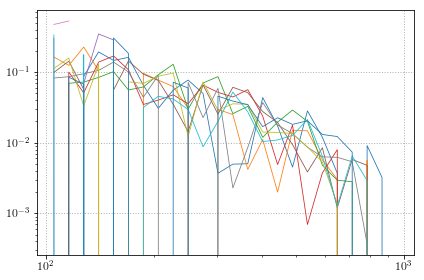

In [91]:
dist_bins = np.logspace(2, 3, 25)
dists = (dist_bins[1:] + dist_bins[:-1]) / 2
fig, ax = plt.subplots()
for name, row in df[ldf_cols].iterrows():
    print(np.sum(row == 0) / len(row))
#     print(row)
#     print(row.sum())
#     ldf = np.array(row)
    ldf = np.array(row / row.sum())
    ax.plot(dists, ldf, marker='None')
#     ax.plot(row[row != 0].values / row.sum(), marker='None')
ax.set_xscale("log")
ax.set_yscale("log", nonposy='clip')
plt.grid()
plt.show()

In [84]:
np.logspace(1, 3, 100)

array([   10.        ,    10.47615753,    10.97498765,    11.49756995,
          12.0450354 ,    12.61856883,    13.21941148,    13.84886371,
          14.50828778,    15.19911083,    15.92282793,    16.68100537,
          17.475284  ,    18.3073828 ,    19.17910262,    20.09233003,
          21.04904145,    22.0513074 ,    23.101297  ,    24.20128265,
          25.35364494,    26.56087783,    27.82559402,    29.15053063,
          30.53855509,    31.99267138,    33.51602651,    35.11191734,
          36.78379772,    38.53528594,    40.37017259,    42.29242874,
          44.30621458,    46.41588834,    48.6260158 ,    50.94138015,
          53.36699231,    55.90810183,    58.57020818,    61.35907273,
          64.28073117,    67.34150658,    70.54802311,    73.90722034,
          77.42636827,    81.11308308,    84.97534359,    89.02150854,
          93.26033469,    97.70099573,   102.35310219,   107.2267222 ,
         112.3324033 ,   117.68119524,   123.28467394,   129.1549665 ,
      

In [85]:
np.linspace(10, 1000, 100)

array([   10.,    20.,    30.,    40.,    50.,    60.,    70.,    80.,
          90.,   100.,   110.,   120.,   130.,   140.,   150.,   160.,
         170.,   180.,   190.,   200.,   210.,   220.,   230.,   240.,
         250.,   260.,   270.,   280.,   290.,   300.,   310.,   320.,
         330.,   340.,   350.,   360.,   370.,   380.,   390.,   400.,
         410.,   420.,   430.,   440.,   450.,   460.,   470.,   480.,
         490.,   500.,   510.,   520.,   530.,   540.,   550.,   560.,
         570.,   580.,   590.,   600.,   610.,   620.,   630.,   640.,
         650.,   660.,   670.,   680.,   690.,   700.,   710.,   720.,
         730.,   740.,   750.,   760.,   770.,   780.,   790.,   800.,
         810.,   820.,   830.,   840.,   850.,   860.,   870.,   880.,
         890.,   900.,   910.,   920.,   930.,   940.,   950.,   960.,
         970.,   980.,   990.,  1000.])

In [86]:
df[[col for col in df.columns if 'ldf' not in col]].columns

Index([u'FractionContainment_Laputop_IceTop',
       u'FractionContainment_Laputop_InIce', u'IceTopMaxSignal',
       u'IceTopMaxSignalInEdge', u'IceTopMaxSignalString',
       u'IceTopNeighbourMaxSignal', u'InIce_charge_1_60', u'NChannels_1_60',
       u'NHits_1_60', u'NStations', u'StationDensity', u'avg_inice_radius',
       u'eloss_1500_standard', u'end_time_mjd',
       u'frac_outside_one_std_inice_radius',
       u'frac_outside_two_std_inice_radius', u'lap_azimuth', u'lap_beta',
       u'lap_chi2', u'lap_energy', u'lap_fitstatus_ok', u'lap_ndf',
       u'lap_rlogl', u'lap_s125', u'lap_s180', u'lap_s250', u'lap_s50',
       u'lap_s500', u'lap_s80', u'lap_x', u'lap_y', u'lap_zenith',
       u'max_qfrac_1_60', u'median_inice_radius', u'mil_qtot_measured',
       u'mil_qtot_predicted', u'mil_rlogl', u'passed_IceTopQualityCuts',
       u'passed_InIceQualityCuts', u'passed_MilliNCascAbove2',
       u'passed_MilliQtotRatio', u'passed_MilliRloglBelow2',
       u'passed_NCh_CoincLaputopCl

In [2]:
config = 'IC79.2010'

In [4]:
df_sim = comp.load_sim(config=config, test_size=0,
                       log_energy_min=None,
                       log_energy_max=None)

/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
df_sim.head()

,FractionContainment_Laputop_IceTop,FractionContainment_Laputop_InIce,FractionContainment_MCPrimary_IceTop,FractionContainment_MCPrimary_InIce,IceTopMaxSignal,IceTopMaxSignalInEdge,IceTopMaxSignalString,IceTopNeighbourMaxSignal,InIce_charge_1_60,MC_azimuth,...,lap_log_energy,lap_cos_zenith,log_s50,log_s80,log_s125,log_s180,log_s250,log_s500,log_dEdX,reco_log_energy
7007_8_10011_0,0.263862,0.823227,0.301645,0.823941,15.278955,0,35,6.816535,227.523614,2.501771,...,5.588231,0.958341,0.540601,0.043165,-0.452514,-0.874391,-1.267455,-2.137247,0.869339,5.795997
7007_8_10052_0,0.124276,0.903348,0.095818,0.925722,13.111668,0,36,5.732233,252.698163,2.501771,...,5.612461,0.958596,0.553992,0.063003,-0.426552,-0.843427,-1.231984,-2.092265,1.435840,5.848487
7007_8_10053_0,0.538892,0.780609,0.476548,0.740079,12.745128,0,34,6.208518,215.590432,2.501771,...,5.628978,0.954839,0.455983,0.024345,-0.408855,-0.779684,-1.126759,-1.899513,0.795524,5.796321
7007_9_10064_0,0.705689,0.713138,0.747118,0.687741,12.770882,0,20,11.841857,223.076372,6.027866,...,5.624046,0.939338,0.725355,0.126170,-0.466122,-0.966938,-1.431117,-2.450963,0.660841,5.738916
7007_10_10033_0,0.636956,0.600601,0.604467,0.618515,8.395354,0,34,5.293567,439.278269,2.881990,...,5.781179,0.958597,1.004949,0.375371,-0.245780,-0.770176,-1.255598,-2.320266,0.762990,5.879991


/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


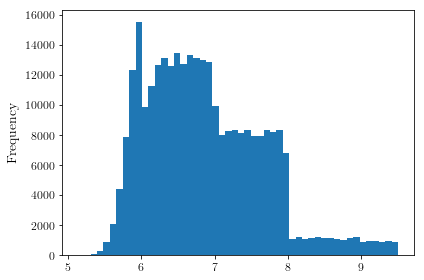

In [6]:
df_sim.MC_log_energy.plot(kind='hist', bins=50)

In [7]:
energy_mask = (df_sim['MC_log_energy'] > 7.25) & (df_sim['MC_log_energy'] < 7.35)

In [8]:
energy_mask.sum()

9620

In [9]:
ldf_cols = [col for col in df_sim.columns if 'ldf' in col]

/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000
/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


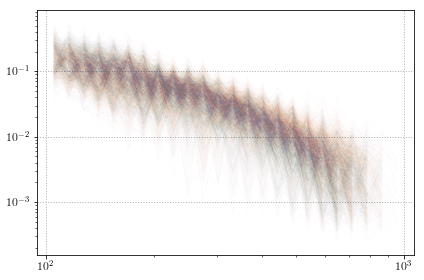

In [10]:
dist_bins = np.logspace(2, 3, 25)
dists = (dist_bins[1:] + dist_bins[:-1]) / 2
fig, ax = plt.subplots()
for name, row in df_sim[energy_mask].sample(2000).iterrows():
    zero_mask = row[ldf_cols] == 0
    ldf = np.array(row[ldf_cols][~zero_mask])
    ldf = ldf / ldf.sum()
    ax.plot(dists[~zero_mask], ldf, marker='None', color=color_dict[row['comp_group_2']], alpha=0.01)
ax.set_xscale("log")
ax.set_yscale("log", nonposy='clip')
plt.grid()
plt.show()

/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000
/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


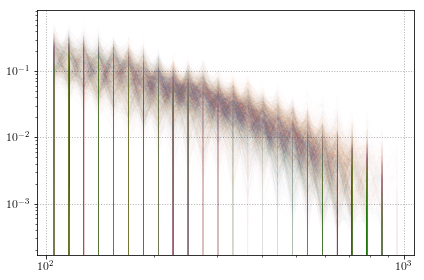

In [11]:
fig, ax = plt.subplots()
for name, row in df_sim[energy_mask].sample(2000).iterrows():
    ldf = np.array(row[ldf_cols])
    ldf = ldf / ldf.sum()
    ax.plot(dists, ldf, marker='None', color=color_dict[row['comp_group_2']], alpha=0.01)
ax.set_xscale("log")
ax.set_yscale("log", nonposy='clip')
plt.grid()
plt.show()

In [11]:
df_sim[ldf_cols]

,ldf_0,ldf_1,ldf_2,ldf_3,ldf_4,ldf_5,ldf_6,ldf_7,ldf_8,ldf_9,...,ldf_14,ldf_15,ldf_16,ldf_17,ldf_18,ldf_19,ldf_20,ldf_21,ldf_22,ldf_23
7007_8_10011_0,2.104840,0.320931,2.686483,0.000000,0.000000,0.000000,0.230100,0.361048,0.286464,0.000000,...,2.817308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7007_8_10052_0,0.509151,0.850679,1.199805,1.064305,0.238629,0.000000,0.000000,0.137542,1.490534,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7007_8_10053_0,2.995156,0.550651,1.337467,0.249824,0.000000,0.152687,0.426439,0.631647,1.395584,0.000000,...,0.382858,0.501409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7007_9_10064_0,0.000000,0.844625,0.000000,0.000000,1.320666,1.160199,0.180908,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7007_10_10033_0,0.000000,1.443764,1.011468,1.731711,0.317907,3.026527,0.234579,0.000000,0.738796,0.925789,...,0.000000,0.590519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7007_10_10043_0,0.000000,2.920748,0.988407,0.000000,0.261979,0.273736,0.348964,0.000000,0.568690,0.207720,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.147286,0.000000,0.000000,0.000000,0.0
7007_10_10067_0,0.000000,1.563750,0.000000,2.473775,0.000000,0.603319,1.109360,0.000000,0.432027,0.000000,...,0.689151,0.000000,1.126142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7007_10_10070_0,0.000000,0.917693,0.000000,0.848737,1.682867,0.000000,0.210313,1.266089,1.832342,0.949425,...,0.593583,0.243452,1.457642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7007_10_10081_0,1.041573,5.063531,0.000000,0.000000,0.000000,1.858548,0.000000,2.103026,1.788303,0.000000,...,1.734761,0.496218,1.157781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7007_10_10091_0,0.000000,1.363093,0.321288,1.227808,0.000000,3.527398,1.279554,0.336201,0.000000,0.424665,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [3]:
from collections import defaultdict

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

Using Theano backend.


In [4]:
num_groups = 4
comp_list = comp.get_comp_list(num_groups)

In [8]:
energybins = comp.get_energybins(config=config)

In [9]:
df_sim_train, df_sim_test = comp.load_sim(config=config, test_size=0.5,
                                          log_energy_min=energybins.log_energy_min,
                                          log_energy_max=energybins.log_energy_max)

/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
len(df_sim_train)

118664

In [12]:
ldf_cols = [col for col in df_sim_train.columns if 'ldf' in col]

In [13]:
isnull_mask_train = df_sim_train[ldf_cols].isnull().sum(axis=1).astype(bool)
isnull_mask_test = df_sim_test[ldf_cols].isnull().sum(axis=1).astype(bool)
zero_ldf = df_sim_train[ldf_cols].sum(axis=1) == 0

In [17]:
isnull_mask_train.sum() / len(isnull_mask_train), isnull_mask_test.sum() / len(isnull_mask_test)

(0.091577900626980388, 0.091687453650643833)

In [18]:
X_train = df_sim_train.loc[~isnull_mask_train, ldf_cols].values
X_train = X_train / X_train.sum(axis=1)[:, None]
y_train = df_sim_train.loc[~isnull_mask_train, f'comp_target_{num_groups}'].values

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=2)

X_test = df_sim_test.loc[~isnull_mask_test, ldf_cols].values
X_test = X_test / X_test.sum(axis=1)[:, None]
y_test = df_sim_test.loc[~isnull_mask_test, f'comp_target_{num_groups}'].values

In [19]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

In [20]:
y_val_cat

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.]])

In [21]:
X_train.shape[1]

24

In [22]:
def get_model(verbose=False):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(num_groups, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    if verbose:
        model.summary()
    
    return model 

In [23]:
get_model(verbose=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 6,020
Trainable params: 6,020
Non-trainable params: 0
_________________________________________________________________


In [24]:
epochs = 100
batch_size = 200

In [25]:
X_train.shape, y_train.shape

((53898, 24), (53898,))

In [283]:
skf = StratifiedKFold(n_splits=10, random_state=2)
cv_results = defaultdict(list)
for idx, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    print(f'On fold {idx}...')
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train_cat[train_index], y_train_cat[test_index]
    
    model = get_model()
    history = model.fit(X_train_fold, y_train_fold,
                        epochs=epochs,
                        validation_data=(X_test_fold, y_test_fold),
                        batch_size=batch_size,
                        verbose=0)
    
    cv_results['acc'].append(history.history['acc'])
    cv_results['val_acc'].append(history.history['val_acc'])

    cv_results['loss'].append(history.history['loss'])
    cv_results['val_loss'].append(history.history['val_loss'])

On fold 0...
On fold 1...
On fold 2...
On fold 3...
On fold 4...
On fold 5...
On fold 6...
On fold 7...
On fold 8...
On fold 9...


In [293]:
cv_df = pd.DataFrame()
cv_df['acc_mean'] = np.mean(cv_results['acc'], axis=0)
cv_df['acc_err'] = np.std(cv_results['acc'], axis=0)

cv_df['val_acc_mean'] = np.mean(cv_results['val_acc'], axis=0)
cv_df['val_acc_err'] = np.std(cv_results['val_acc'], axis=0)

cv_df['loss_mean'] = np.mean(cv_results['loss'], axis=0)
cv_df['loss_err'] = np.std(cv_results['loss'], axis=0)

cv_df['val_loss_mean'] = np.mean(cv_results['val_loss'], axis=0)
cv_df['val_loss_err'] = np.std(cv_results['val_loss'], axis=0)

/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


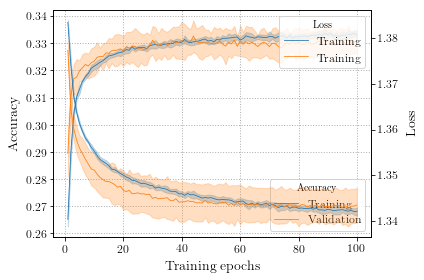

In [301]:
fig, ax = plt.subplots()

ax.plot(range(1, epochs+1), cv_df['acc_mean'], marker='None', color='C0', 
        label='Training')
ax.fill_between(range(1, epochs+1),
                cv_df['acc_mean'] + cv_df['acc_err'], 
                cv_df['acc_mean'] - cv_df['acc_err'],
                color='C0', alpha=0.25)

ax.plot(range(1, epochs+1), cv_df['val_acc_mean'], marker='None', color='C1', 
        label='Validation')
ax.fill_between(range(1, epochs+1),
                cv_df['val_acc_mean'] + cv_df['val_acc_err'], 
                cv_df['val_acc_mean'] - cv_df['val_acc_err'],
                color='C1', alpha=0.25)

ax_loss = ax.twinx()
ax_loss.plot(range(1, epochs+1), cv_df['loss_mean'], marker='None', color='C0', 
             label='Training')
ax_loss.fill_between(range(1, epochs+1),
                     cv_df['loss_mean'] + cv_df['loss_err'], 
                     cv_df['loss_mean'] - cv_df['loss_err'],
                     color='C0', alpha=0.25)

ax_loss.plot(range(1, epochs+1), cv_df['val_loss_mean'], marker='None', color='C1', 
             label='Training')
ax_loss.fill_between(range(1, epochs+1),
                     cv_df['val_loss_mean'] + cv_df['val_loss_err'], 
                     cv_df['val_loss_mean'] - cv_df['val_loss_err'],
                     color='C1', alpha=0.25)

ax.set_xlabel('Training epochs')
ax.set_ylabel('Accuracy')
ax_loss.set_ylabel('Loss')

ax.grid()
ax.legend(title='Accuracy')
ax_loss.legend(title='Loss')

plt.show()

In [24]:
model = get_model(verbose=True)
history = model.fit(X_train, y_train_cat,
                    epochs=40,
                    batch_size=batch_size,
                    verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 6,020
Trainable params: 6,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
67846/67846 [==============================] - 1s - loss: 1.3822 - acc: 0.2706     
Epoch 2/40
67846/67846 [=====================

In [31]:
acc = history.history['acc']
loss = history.history['loss']

/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


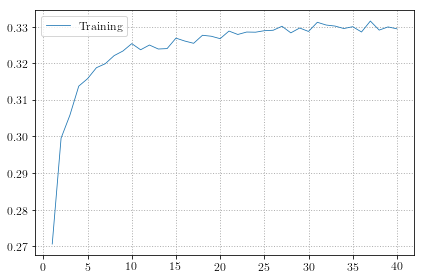

In [32]:
fig, ax = plt.subplots()
ax.plot(range(1, 40+1), acc, marker='None', label='Training')
# ax.plot(range(1, epochs+1), val_acc, marker='None', label='Validation')
ax.grid()
ax.legend()
plt.show()

In [66]:
pred_train = model.predict_proba(X_train)
pred_val = model.predict_proba(X_val)
pred_test = model.predict_proba(X_test)

135456/135528 [============================>.] - ETA: 0s

In [67]:
_four_group_encoding = {}
_four_group_encoding['PPlus'] = 0
_four_group_encoding['He4Nucleus'] = 1
_four_group_encoding['O16Nucleus'] = 2
_four_group_encoding['Fe56Nucleus'] = 3

In [68]:
df_val_pred = pd.DataFrame(pred_val, columns=comp_list)
df_val_pred['composition'] = [comp_list[i] for i in y_val]
df_val_pred.head()

,PPlus,He4Nucleus,O16Nucleus,Fe56Nucleus,composition
0,0.238695,0.263560,0.252116,0.245630,O16Nucleus
1,0.237995,0.260882,0.255057,0.246066,He4Nucleus
2,0.265025,0.271092,0.243994,0.219890,PPlus
3,0.170382,0.227749,0.275511,0.326358,Fe56Nucleus
4,0.195716,0.236309,0.267852,0.300123,O16Nucleus


In [69]:
df_test_pred = pd.DataFrame(pred_test, columns=comp_list)
df_test_pred['composition'] = [comp_list[i] for i in y_test]
df_test_pred.head()

,PPlus,He4Nucleus,O16Nucleus,Fe56Nucleus,composition
0,0.243602,0.264670,0.252021,0.239707,O16Nucleus
1,0.292433,0.287322,0.234532,0.185713,He4Nucleus
2,0.251332,0.270132,0.250351,0.228184,He4Nucleus
3,0.151262,0.201509,0.275671,0.371558,O16Nucleus
4,0.195794,0.237919,0.268535,0.297751,O16Nucleus


/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


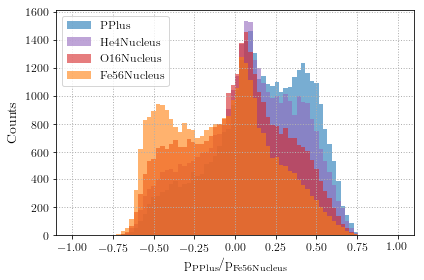

In [70]:
fig, ax = plt.subplots()
for composition in comp_list:
    label = _four_group_encoding[composition]
    comp_mask = df_test_pred['composition'] == composition
    a = np.log10(df_test_pred['PPlus']) - np.log10(df_test_pred['Fe56Nucleus']) 
    p_bins = np.linspace(-1, 1, 75)
    ax.hist(a[comp_mask], bins=p_bins,
               color=color_dict[composition], alpha=0.6,
               label=composition)
ax.set_xlabel('$\mathrm{p_{PPlus}/p_{Fe56Nucleus}}$')
ax.set_ylabel('Counts')
ax.grid()
ax.legend()
plt.show()

/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


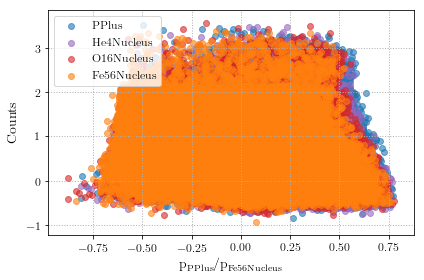

In [87]:
fig, ax = plt.subplots()
for composition in comp_list:
    label = _four_group_encoding[composition]
    comp_mask = df_sim_test.loc[~isnull_mask_test, f'comp_group_{num_groups}'] == composition
    a = np.log10(df_test_pred['PPlus']) - np.log10(df_test_pred['Fe56Nucleus']) 
    p_bins = np.linspace(-1, 1, 75)
    ax.scatter(a[comp_mask.values], df_sim_test.loc[~isnull_mask_test & comp_mask, 'log_s125'].values,
               c=color_dict[composition], alpha=0.6,
               label=composition)
ax.set_xlabel('$\mathrm{p_{PPlus}/p_{Fe56Nucleus}}$')
ax.set_ylabel('Counts')
ax.grid()
ax.legend()
plt.show()

/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


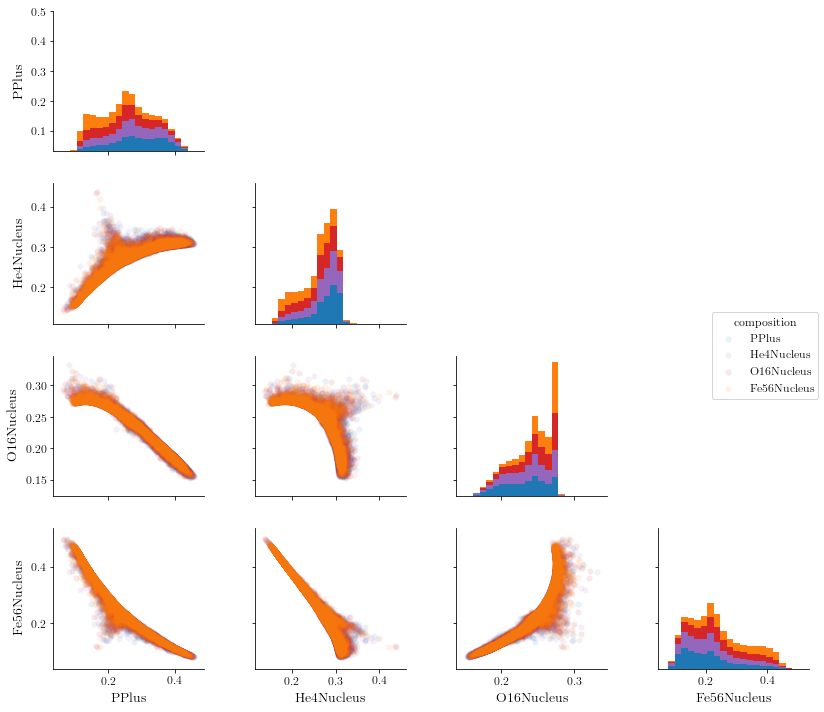

In [71]:
g = sns.pairplot(df_test_pred, hue='composition', hue_order=comp_list,
                 palette=[color_dict[c] for c in comp_list],
                 markers='o',
                 plot_kws=dict(alpha=0.1, lw=0),
                 diag_kws=dict(bins=20))
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

/data/user/jbourbeau/miniconda/envs/composition/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


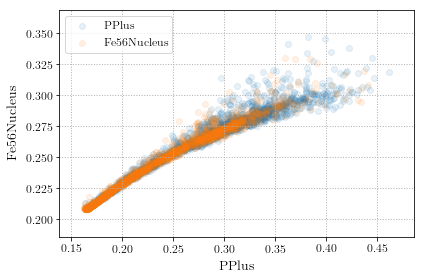

In [225]:
fig, ax = plt.subplots()
for composition in comp_list:
    if composition in ['He4Nucleus', 'O16Nucleus']:
        continue
    label = _four_group_encoding[composition]
    comp_mask = y_train == label
    ax.scatter(pred_train[comp_mask, 0], pred_train[comp_mask, 3],
               c=color_dict[composition], alpha=0.1,
               label=composition)
ax.set_xlabel('PPlus')
ax.set_ylabel('Fe56Nucleus')
ax.grid()
ax.legend()
plt.show()

In [202]:
y_test

array([2, 3, 1, 1, 3, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 3,
       0, 3, 0, 0, 3, 0, 0, 3, 1, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 3,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 1, 0, 3, 3, 2, 3, 1, 2,
       0, 1, 2, 0, 1, 1, 3, 0, 2, 3, 1, 3, 0, 0, 3, 3, 1, 2, 3, 3, 3, 0, 0,
       1, 2, 1, 2, 1, 2, 0, 0, 1, 3, 0, 0, 0, 2, 1, 1, 1, 3, 2, 3, 0, 2, 1,
       1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 3, 2, 0, 3, 2, 3, 2, 1, 2, 1, 2, 2, 0,
       3, 0, 3, 2, 3, 0, 0, 3, 1, 1, 2, 3, 3, 1, 1, 1, 0, 3, 3, 2, 2, 1, 2,
       0, 0, 2, 3, 0, 0, 2, 1, 0, 3, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 3,
       1, 0, 1, 2, 2, 3, 1, 1, 3, 1, 1, 0, 1, 3, 1, 3, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 3, 1, 3, 0, 1, 3, 1, 3, 1, 3, 2,
       2, 2, 3, 0, 3, 0, 1, 1, 1, 3, 0, 2, 0, 3, 3, 1, 3, 2, 1, 0, 1, 2, 3,
       0, 1, 1, 3, 3, 3, 0, 2, 0, 2, 0, 2, 2, 3, 0, 0, 1, 0, 3, 2, 3, 0, 2,
       3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 0, 1, 3, 1, 1, 3, 2, 0, 1, 1, 0, 1, 1,
       0, 0,

In [51]:
score = model.evaluate(X_test, y_test_cat, batch_size=18)
score

133326/135528 [============================>.] - ETA: 0s

[1.3427681758358603, 0.32995396506352004]